In [1]:
# core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# data
from sklearn.datasets import load_breast_cancer
%matplotlib inline

# Supervised Learning - Classification 

### Cancer Dataset

In [2]:
data = load_breast_cancer()
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
(
    X_train,
    X_test,
    y_train,
    y_test
) = train_test_split(
    data.data,
    data.target,
    stratify=data.target,
    test_size = 0.33,
    random_state=0
)

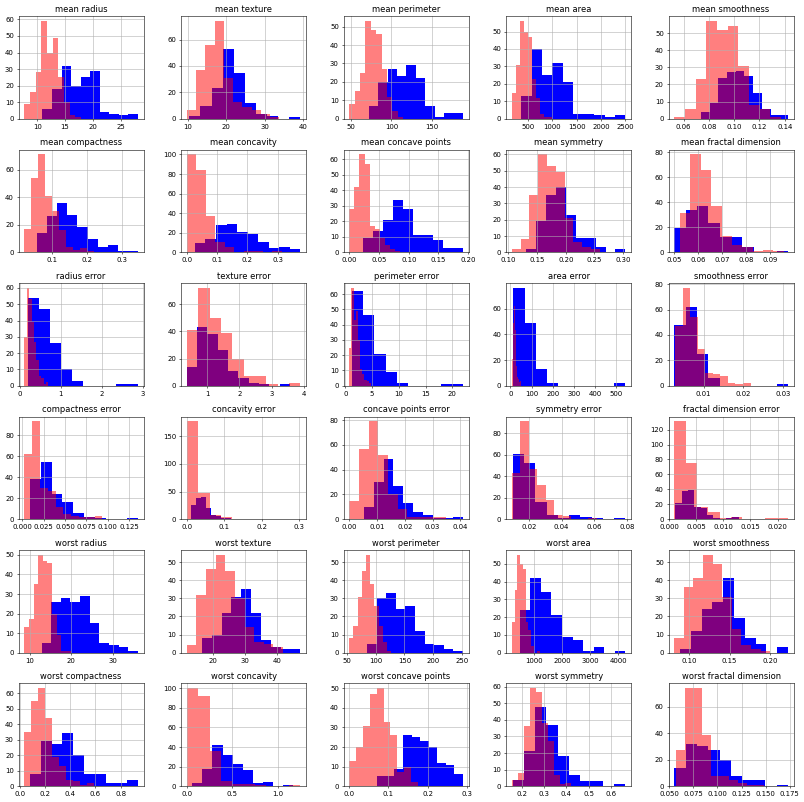

In [4]:
dataf = (
    pd.DataFrame(X_train, columns=data["feature_names"])
    .assign(target=y_train)
)
fig, axes = plt.subplots(figsize=(20,20), dpi=50, nrows=6, ncols=5)

# BLUE COLOR == 'benign', RED COLOR == 'malignant'
dataf[dataf["target"] == 0].drop("target", axis=1).hist(ax=axes, alpha=1, label='benign',color='b')
dataf[dataf["target"] == 1].drop("target", axis=1).hist(ax=axes, alpha=0.5, label='malignant',color='r');
del dataf, fig, axes # free memory

## Question 1
Exploratory data analysis (EDA)
- Print the target counts for your training data. 
- Explain, briefly and in bullets, what we may learn from the feature plots above. (For example, which features seem to be best differentiators between the two classes - benign and malignant) - BLUE COLOR == 'benign', RED COLOR == 'malignant'
- Based on the distributions above, would scaling be required for, say, a neural network?
<br>

- Industry reflections: Consider the data and its size. For this domain, is it enough data? Would you ask the domain experts anything?

In [5]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(data.target_names, np.bincount(data.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


### Question 2
Create a KNeighborsClassifier for the above train and test data. Print the training and test accuracy. 
- (If using gridsearch on (X_train, y_train), document your choices of model parameters and ranges.)
- Bonus: Use .predict_proba and plot the result using plt.hist(probas[:, 1]) - What can this tell us?

In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(f'Model: {knn}')
print('Accuracy on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(knn.score(X_test, y_test)))  

Model: KNeighborsClassifier()
Accuracy on the training set: 0.945
Accuracy on test set: 0.915


Text(0, 0.5, 'Frequency')

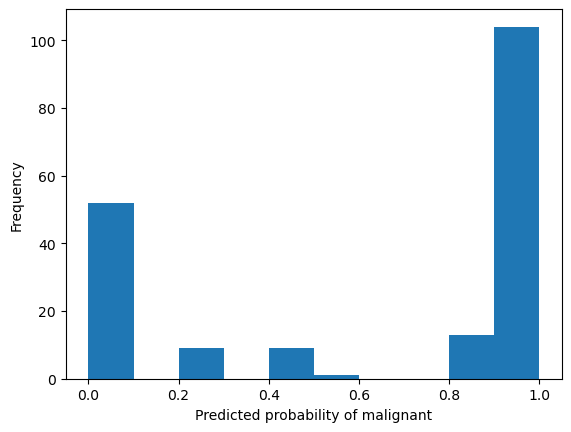

In [7]:
probas = knn.predict_proba(X_test)
plt.hist(probas[:, 1], bins=10)
plt.xlabel('Predicted probability of malignant')
plt.ylabel('Frequency')

## Question 3
We'd like to try several other models. To save some work, write a function called eval_model that takes two arguments
<ul>
    <li>model: an instantiated classifier model</li>
    <li>name: a string, eg, "knn"</li>
</ul>
    
You can create a model like this:

knn = KNeighborsClassifier()

Then you can pass knn to the function as the model. The function should fit the model to X_train, and y_train, which should already be defined as global variables. Then it should score to model on the training and test data. X_test and y_test should also be defined as global variables.

- You can use gridsearch in the function. Same rules as stated in Q2




In [8]:
# Define a function that evaluates a given model on a dataset and returns the test and train accuracies
def eval_model(model, name, scaler = None, _X_train = X_train, _X_test = X_test, _y_train = y_train, _y_test = y_test):
    
    # If a scaler is provided, scale the training and test data
    if scaler:
        _X_train = scaler.fit_transform(_X_train)
        _X_test = scaler.transform(_X_test)
    
    # Fit the model to the training data
    model.fit(_X_train, _y_train)
    
    # Print the name of the model
    print(name, ":")
    
    # Evaluate the model on the test and training data
    test_accuracy = model.score(_X_test, _y_test)
    train_accuracy = model.score(_X_train, _y_train)
    
    # Print the accuracies
    print(f'Training Accuracy: {train_accuracy}')
    print(f'Test Accuracy: {test_accuracy}')
    
    # Return the test and train accuracies
    return (test_accuracy, train_accuracy)


Text(0, 0.5, 'Frequency')

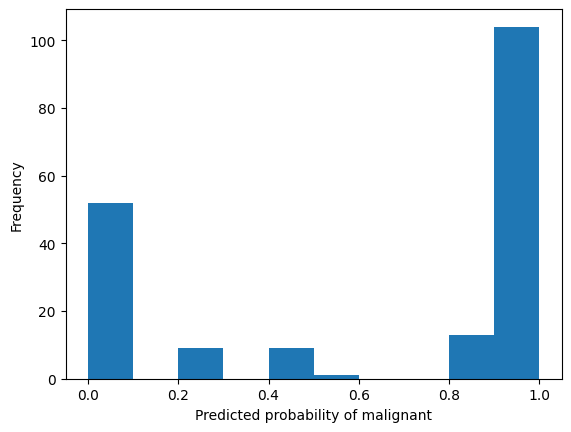

In [ ]:
# Plotting predicted probability of malignancy from knn model
# based on data from test set
probas = knn.predict_proba(X_test)
# creating histogram with 10 mins to show the frequency of probas
plt.hist(probas[:, 1], bins=10)
plt.xlabel('Predicted probability of malignant')
plt.ylabel('Frequency')

## Question 4
Now use eval_model to evaluate LogisticRegression, DecisionTreeClassifier, RandomForestClassifier and MLPClassifier. 
- Bonus: Plot the train and test accuracies for all estimators in a bar chart (Is this a fair comparison?)
 

In [9]:
res = {}
for model in [
    LogisticRegression(max_iter=10_000), 
    DecisionTreeClassifier(), 
    RandomForestClassifier(), 
    MLPClassifier(max_iter=10_000)
]:
    res[model.__class__.__name__] = eval_model(model, model.__class__.__name__, scaler=None)
    print()


LogisticRegression :
Training Accuracy: 0.9711286089238845
Test Accuracy: 0.9361702127659575

DecisionTreeClassifier :
Training Accuracy: 1.0
Test Accuracy: 0.9414893617021277

RandomForestClassifier :
Training Accuracy: 1.0
Test Accuracy: 0.9414893617021277

MLPClassifier :
Training Accuracy: 0.952755905511811
Test Accuracy: 0.9361702127659575



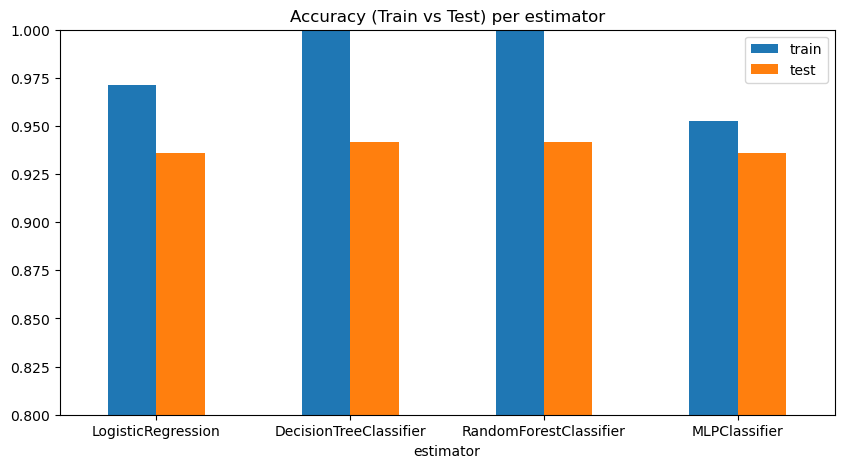

In [10]:
(
    pd.DataFrame(res)
    .T.
    rename(columns={0: "test", 1: "train"})
    .reset_index()
    .rename(columns={"index": "estimator"})
    .plot(
        x="estimator",
        y=["train", "test"],
        ylim=(0.8, 1.0),
        kind="bar",
        rot=0,
        figsize=(10, 5),
        title="Accuracy (Train vs Test) per estimator")
);

Question 5:
Apply a scaling method (e.g., standard scaling) to your data and repeat question 4 with the scaled data.
- Remember that (X_test, y_test) are meant to be unseen data. Use this to decide what the scaler should fit to and transform on.
- Report the results of scaling the data
- Bonus: Explain what the scaler accomplishes for us.

In [11]:
res = {}
for model in [
    LogisticRegression(max_iter=10_000), 
    DecisionTreeClassifier(), 
    RandomForestClassifier(), 
    MLPClassifier(max_iter=10_000)
]:
    res[model.__class__.__name__] = eval_model(model, model.__class__.__name__, scaler=StandardScaler())
    print()


LogisticRegression :
Training Accuracy: 0.9921259842519685
Test Accuracy: 0.9627659574468085

DecisionTreeClassifier :
Training Accuracy: 1.0
Test Accuracy: 0.9574468085106383

RandomForestClassifier :
Training Accuracy: 1.0
Test Accuracy: 0.9468085106382979

MLPClassifier :
Training Accuracy: 0.9973753280839895
Test Accuracy: 0.9574468085106383



## Question 6
Train a logistic regression estimator on a scaled version of X_train.

Then print the three features with the highest coefficients -- these are the features which the model most strongly links with the target, <i>malignant</i>. Print the three features with the lowest coefficients -- these are the features which the model most strongly links with the target, <i>benign</i>. On each line, print the feature name, followed by its coefficient value.

- Bonus: Plot the coefficients in a bar chart (*plt.bar()*) with the variable names on the x axis

In [12]:
logreg = LogisticRegression(max_iter=10_000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [13]:
coefs=logreg.coef_[0]

sorted_coefs = sorted ((zip(data.feature_names, coefs)),
                key = lambda e:e[1], reverse=True )
                
print("Highest Coefficients (Malignant)")
for c in sorted_coefs[:3]:
    print(c)

print("\nLowest Coefficients (Malignant)")
for c in sorted_coefs[-3:]:
    print(c)

Highest Coefficients (Malignant)
('compactness error', 0.5975211218199213)
('symmetry error', 0.48603193963311314)
('fractal dimension error', 0.39967782128961976)

Lowest Coefficients (Malignant)
('mean concave points', -1.0121099296381788)
('radius error', -1.058074875510626)
('worst texture', -1.0724828206381865)


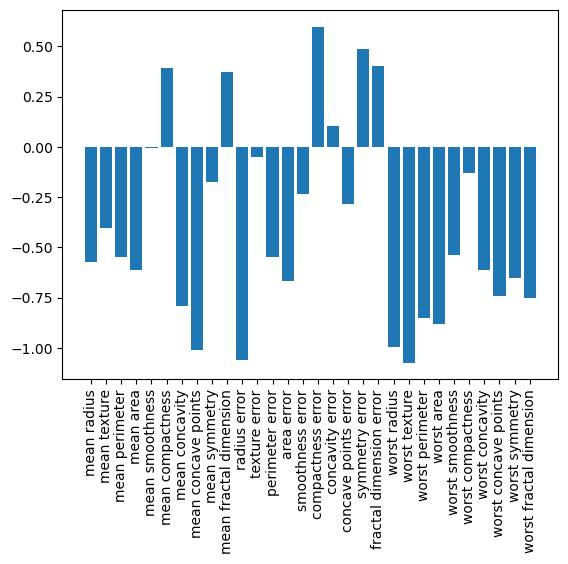

In [14]:
# plot feature importance
plt.bar(data.feature_names, logreg.coef_[0])
plt.xticks(rotation=90)
plt.show()

## Question 7
Print the 3 features that are the <i>least</i> informative about our target value (Hint: you should use the absolute value of coefficients.)

In [15]:
coefs=logreg.coef_[0]
c_abs = list(map(abs, coefs))

sorted_coefs = sorted ((zip(data.feature_names, c_abs)),
                key = lambda e:e[1], reverse=True )
print("Lowest Coefficients (Abs Value)")

for c in sorted_coefs[-3:]:
    print(c)

Lowest Coefficients (Abs Value)
('concavity error', 0.10345870287054079)
('texture error', 0.05108763253922354)
('mean smoothness', 0.005619749883586767)


## Question 8
Use the classification_report function with the logreg model. It takes two arguments:
<ul>
    <li>y_test: the correct classifications</li>
    <li>preds: the model predictions. (You should assign logreg.predict(X_test) to preds.)</li>
    </ul>
    
There is an optional third argument, which is the feature names. You can write target_names=data.target_names.
        

In [16]:
preds=logreg.predict(X_test_scaled)
print(classification_report(y_test,preds , target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.94      0.96      0.95        70
      benign       0.97      0.97      0.97       118

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



## Question 9
For prediction probabilities (.predict_proba), predictions are related to these probabilities as follows: If the second probability is greater than .5, the prediction is 1. Otherwise, it's 0.  

1. Use the predict_proba method to get the probabilities of the logreg predictions on the X_test data. 
- Bonus: As in Q2, plot the the probabilities of class 1 (Malignant) and compare the plot with the same plot from Q2

2. Convert the probabilites to an arrray of predictions by mapping the following lambda function <br>
lambda a:1 if a[1]>.5 else 0

3. Show that the resulting array is equal to the original preds array, e.g., using numpy.array.equal or all()

4. Try to make the code below under *'Accuracies over probabilities* work. You need to supply 'preds' (from .predict) and 'probas' (from .predict_proba) - What can the resulting plot tell us about our model?


Text(0, 0.5, 'Frequency')

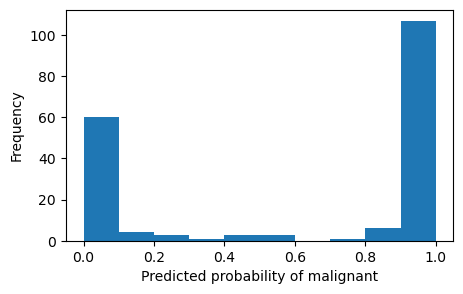

In [17]:
probas = logreg.predict_proba(X_test_scaled)

plt.figure(figsize=(5, 3))
plt.hist(probas[:, 1], bins=10)
plt.xlabel('Predicted probability of malignant')
plt.ylabel('Frequency')


In [18]:
preds = list(map(lambda x: 1 if x > 0.5 else 0, probas[:, 1]))
all(preds == logreg.predict(X_test_scaled))

True

### Accuracy over probabilities

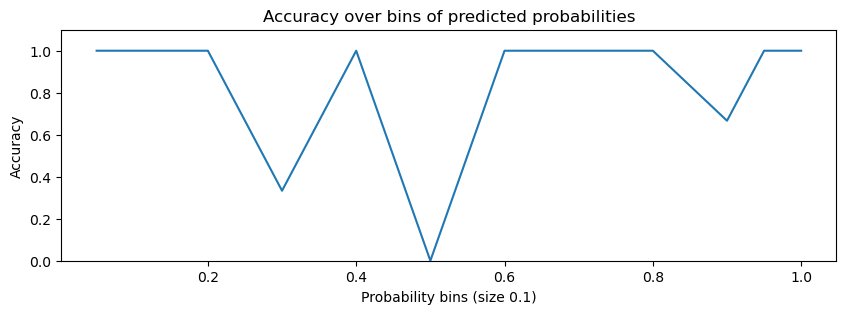

In [19]:
preds_df = (
    pd.DataFrame(
        {
            "preds": preds, # the predicted class
             "probas": probas[:, 1], # the predicted probability of class 1
             "y_test": y_test, # the true class
             "proba_bins": pd.cut(probas[:, 1], bins=20) # the bins (0.05) of the predicted probability
        }
    )
)

intervals, accs = [], []
for idx, interval in preds_df.groupby("proba_bins"):
    if not interval.empty:
        intervals.append(idx.right)
        accs.append(accuracy_score(interval["y_test"], interval["preds"]))

# plot accs over intervals
plt.figure(figsize=(10, 3))
plt.plot(intervals, accs) 
plt.xlabel("Probability bins (size 0.1)")
plt.ylabel("Accuracy")
plt.ylim(.0, 1.1)
plt.title("Accuracy over bins of predicted probabilities");

## Question 10
Write a function, predict_threshold, that takes two arguments:
<ul>
    <li>probas: the output of predict_proba (for a binary classification task)</li>
    <li>t: a threshold probability. Class 1 is predicted if the probability is greater than t. Otherwise class 0 is predicted.</li>
</ul>

In [20]:
# for binary case
def predict_threshold(predsProb, t):
    return np.array(list(map(lambda a:1 if a[1]>t else 0, predsProb)))

Now produce a classification report for several different thresholds, using the probabilities output by logistic regression for the Cancer data. 
- Find a threshold that maximizes the precision for benign. 
- Find a threshold that maximizes precision for malignant. 
- Experiment with different thresholds -- what do you think is the best theshold for this particular domain - Predicting breast cancer? Why?

In [21]:
preds =  logreg.predict_proba(X_test_scaled)

In [22]:
print(classification_report(y_test, predict_threshold(preds,.5), target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.94      0.96      0.95        70
      benign       0.97      0.97      0.97       118

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



In [23]:
print(classification_report(y_test, predict_threshold(preds,.9), target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.86      1.00      0.93        70
      benign       1.00      0.91      0.95       118

    accuracy                           0.94       188
   macro avg       0.93      0.95      0.94       188
weighted avg       0.95      0.94      0.94       188



In [24]:
print(classification_report(y_test, predict_threshold(preds,.99), target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.65      1.00      0.79        70
      benign       1.00      0.69      0.81       118

    accuracy                           0.80       188
   macro avg       0.83      0.84      0.80       188
weighted avg       0.87      0.80      0.81       188



In [25]:
print(classification_report(y_test, predict_threshold(preds,.01), target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.81      0.90        70
      benign       0.90      1.00      0.95       118

    accuracy                           0.93       188
   macro avg       0.95      0.91      0.92       188
weighted avg       0.94      0.93      0.93       188

